### 과일 분류

https://www.kaggle.com/datasets/sshikamaru/fruit-recognition

# 불러온 데이터 전처리

In [10]:
from glob import glob
import os


root = './datasets/fruits/original/'

directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])


print(directory_names)

['Apple_Braeburn', 'Apple_Granny_Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus_fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber_Ripe', 'Grape_Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion_White', 'Orange', 'Papaya', 'Passion_Fruit', 'Peach', 'Pear', 'Pepper_Green', 'Pepper_Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato_Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


In [11]:
root = './datasets/fruits/original/'



for name in directory_names:
    directory_path = os.path.join(root, name)
    print(directory_path)
    for i, file_name in enumerate(os.listdir(directory_path)):
        # 처리 전에 디렉토리 이름의 공백을 밑줄로 바꿉니다
        if directory_path:
            old_file = os.path.join(directory_path, file_name)
            new_file = os.path.join(directory_path, f"{name}{i + 1}.png")

        os.rename(old_file, new_file)


./datasets/fruits/original/Apple_Braeburn
./datasets/fruits/original/Apple_Granny_Smith
./datasets/fruits/original/Apricot
./datasets/fruits/original/Avocado
./datasets/fruits/original/Banana
./datasets/fruits/original/Blueberry
./datasets/fruits/original/Cactus_fruit
./datasets/fruits/original/Cantaloupe
./datasets/fruits/original/Cherry
./datasets/fruits/original/Clementine
./datasets/fruits/original/Corn
./datasets/fruits/original/Cucumber_Ripe
./datasets/fruits/original/Grape_Blue
./datasets/fruits/original/Kiwi
./datasets/fruits/original/Lemon
./datasets/fruits/original/Limes
./datasets/fruits/original/Mango
./datasets/fruits/original/Onion_White
./datasets/fruits/original/Orange
./datasets/fruits/original/Papaya
./datasets/fruits/original/Passion_Fruit
./datasets/fruits/original/Peach
./datasets/fruits/original/Pear
./datasets/fruits/original/Pepper_Green
./datasets/fruits/original/Pepper_Red
./datasets/fruits/original/Pineapple
./datasets/fruits/original/Plum
./datasets/fruits/o

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root, target_size=(244, 244), batch_size=8, class_mode='categorical')
print(generator.class_indices)

Found 16854 images belonging to 33 classes.
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper_Green': 23, 'Pepper_Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato_Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [13]:
import pandas as pd

f_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
f_df
f_df.file_paths

0        ./datasets/fruits/original/Apple_Braeburn\Appl...
1        ./datasets/fruits/original/Apple_Braeburn\Appl...
2        ./datasets/fruits/original/Apple_Braeburn\Appl...
3        ./datasets/fruits/original/Apple_Braeburn\Appl...
4        ./datasets/fruits/original/Apple_Braeburn\Appl...
                               ...                        
16849    ./datasets/fruits/original/Watermelon\Watermel...
16850    ./datasets/fruits/original/Watermelon\Watermel...
16851    ./datasets/fruits/original/Watermelon\Watermel...
16852    ./datasets/fruits/original/Watermelon\Watermel...
16853    ./datasets/fruits/original/Watermelon\Watermel...
Name: file_paths, Length: 16854, dtype: object

In [14]:
f_df.loc[:, 'file_paths'] = f_df.file_paths.apply(lambda x: x.replace('\\', '/')).reset_index(drop=True)
f_df.loc[:, 'file_paths'] = f_df.file_paths.apply(lambda x: x.replace(' ', '_')).reset_index(drop=True)
f_df
f_df.file_paths

0        ./datasets/fruits/original/Apple_Braeburn/Appl...
1        ./datasets/fruits/original/Apple_Braeburn/Appl...
2        ./datasets/fruits/original/Apple_Braeburn/Appl...
3        ./datasets/fruits/original/Apple_Braeburn/Appl...
4        ./datasets/fruits/original/Apple_Braeburn/Appl...
                               ...                        
16849    ./datasets/fruits/original/Watermelon/Watermel...
16850    ./datasets/fruits/original/Watermelon/Watermel...
16851    ./datasets/fruits/original/Watermelon/Watermel...
16852    ./datasets/fruits/original/Watermelon/Watermel...
16853    ./datasets/fruits/original/Watermelon/Watermel...
Name: file_paths, Length: 16854, dtype: object

## 데이터 분리

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
train_test_split(f_df.file_paths, f_df.targets, stratify=f_df.targets, test_size=0.6, random_state=124)

X_train, X_test, y_train, y_test =\
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

X_train, X_val, y_train, y_val =\
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

targets
12    251
31    189
22    177
24    170
21    126
19    126
16    126
20    126
7     126
9     126
8     126
0     126
1     126
6     126
4     126
27    126
29    126
15    126
14    125
25    125
2     125
30    125
18    122
32    122
13    119
5     118
28    115
10    115
23    114
26    114
17    112
3     110
11    101
Name: count, dtype: int64
targets
12    63
31    47
22    45
24    43
14    32
2     32
30    32
0     32
27    32
25    32
21    32
16    31
15    31
8     31
6     31
20    31
18    31
9     31
1     31
29    31
7     31
4     31
19    31
32    30
13    30
5     30
28    29
10    29
26    29
17    28
23    28
3     27
11    25
Name: count, dtype: int64
targets
12    79
31    59
22    56
24    53
2     40
19    40
8     40
7     40
14    40
30    40
1     40
21    39
15    39
16    39
4     39
9     39
20    39
27    39
0     39
29    39
25    39
6     39
32    38
18    38
5     37
13    37
28    36
26    36
10    36
17    35
23    35
3     34
11    31


## 각 폴더에 저장

In [16]:
import shutil

root = './datasets/fruits/'

for file_path in X_train:
    print(file_path)
    face_dir = file_path[len(root+'original/'):file_path.rindex('/')]
    print(face_dir)
    destination = os.path.join(root,'train/'+face_dir)
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(file_path, destination)

./datasets/fruits/original/Apricot/Apricot329.png
Apricot
./datasets/fruits/original/Potato_Red/Potato_Red115.png
Potato_Red
./datasets/fruits/original/Pear/Pear305.png
Pear
./datasets/fruits/original/Tomato/Tomato86.png
Tomato
./datasets/fruits/original/Potato_Red/Potato_Red24.png
Potato_Red
./datasets/fruits/original/Limes/Limes245.png
Limes
./datasets/fruits/original/Raspberry/Raspberry3.png
Raspberry
./datasets/fruits/original/Plum/Plum397.png
Plum
./datasets/fruits/original/Limes/Limes179.png
Limes
./datasets/fruits/original/Banana/Banana412.png
Banana
./datasets/fruits/original/Banana/Banana372.png
Banana
./datasets/fruits/original/Cactus_fruit/Cactus_fruit222.png
Cactus_fruit
./datasets/fruits/original/Pepper_Red/Pepper_Red631.png
Pepper_Red
./datasets/fruits/original/Blueberry/Blueberry175.png
Blueberry
./datasets/fruits/original/Raspberry/Raspberry60.png
Raspberry
./datasets/fruits/original/Peach/Peach263.png
Peach
./datasets/fruits/original/Pear/Pear652.png
Pear
./datasets/fr

In [17]:
import shutil

root = './datasets/fruits/'

for file_path in X_val:
    print(file_path)
    face_dir = file_path[len(root+'original/'):file_path.rindex('/')]
    print(face_dir)
    destination = os.path.join(root,'validation/'+face_dir)
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(file_path, destination)

./datasets/fruits/original/Lemon/Lemon427.png
Lemon
./datasets/fruits/original/Raspberry/Raspberry441.png
Raspberry
./datasets/fruits/original/Cherry/Cherry445.png
Cherry
./datasets/fruits/original/Plum/Plum228.png
Plum
./datasets/fruits/original/Peach/Peach310.png
Peach
./datasets/fruits/original/Pear/Pear560.png
Pear
./datasets/fruits/original/Tomato/Tomato83.png
Tomato
./datasets/fruits/original/Orange/Orange119.png
Orange
./datasets/fruits/original/Cantaloupe/Cantaloupe68.png
Cantaloupe
./datasets/fruits/original/Mango/Mango249.png
Mango
./datasets/fruits/original/Grape_Blue/Grape_Blue88.png
Grape_Blue
./datasets/fruits/original/Orange/Orange279.png
Orange
./datasets/fruits/original/Kiwi/Kiwi17.png
Kiwi
./datasets/fruits/original/Grape_Blue/Grape_Blue163.png
Grape_Blue
./datasets/fruits/original/Banana/Banana171.png
Banana
./datasets/fruits/original/Orange/Orange341.png
Orange
./datasets/fruits/original/Pomegranate/Pomegranate376.png
Pomegranate
./datasets/fruits/original/Cantaloup

In [18]:
import shutil

root = './datasets/fruits/'

for file_path in X_test:
    print(file_path)
    face_dir = file_path[len(root+'original/'):file_path.rindex('/')]
    print(face_dir)
    destination = os.path.join(root,'test/'+face_dir)
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(file_path, destination)

./datasets/fruits/original/Peach/Peach259.png
Peach
./datasets/fruits/original/Apricot/Apricot75.png
Apricot
./datasets/fruits/original/Raspberry/Raspberry290.png
Raspberry
./datasets/fruits/original/Pear/Pear108.png
Pear
./datasets/fruits/original/Papaya/Papaya142.png
Papaya
./datasets/fruits/original/Raspberry/Raspberry394.png
Raspberry
./datasets/fruits/original/Pepper_Green/Pepper_Green55.png
Pepper_Green
./datasets/fruits/original/Cactus_fruit/Cactus_fruit443.png
Cactus_fruit
./datasets/fruits/original/Pepper_Green/Pepper_Green249.png
Pepper_Green
./datasets/fruits/original/Pepper_Red/Pepper_Red587.png
Pepper_Red
./datasets/fruits/original/Grape_Blue/Grape_Blue171.png
Grape_Blue
./datasets/fruits/original/Onion_White/Onion_White342.png
Onion_White
./datasets/fruits/original/Pineapple/Pineapple30.png
Pineapple
./datasets/fruits/original/Apple_Braeburn/Apple_Braeburn120.png
Apple_Braeburn
./datasets/fruits/original/Pineapple/Pineapple251.png
Pineapple
./datasets/fruits/original/Pome

## 데이터 제너레이터

In [260]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/fruits/train'
validation_dir = './datasets/fruits/validation'
test_dir = './datasets/fruits/test'

train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 4313 images belonging to 33 classes.
Found 1056 images belonging to 33 classes.
Found 1349 images belonging to 33 classes.
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper_Green': 23, 'Pepper_Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato_Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit':

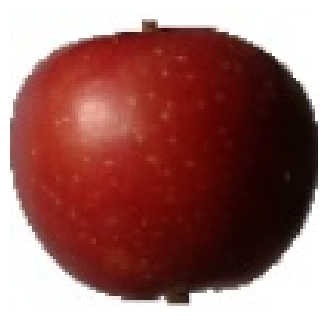

In [261]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(generator.filepaths[333]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')
    
show_image(image)

# Pre_Cycle - Filter 64
- Batch size = 8
- 퍼포먼스 미적용
- Flatten 적용

In [262]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Flatten
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_base_model():
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    
    x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(2)(x)
    
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [263]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_base_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_38 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 122, 122, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 300)                 │      17,280,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 33)                  │           9,933 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,328,953 (66.10 MB)

 Trainable params: 17,328,953 (66.10 MB)

 Non-trainable params: 0 (0.00 B)

In [264]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [265]:
pre_history1 = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb],
    shuffle=True
)

Epoch 1/20
  1/540 ━━━━━━━━━━━━━━━━━━━━ 11:15 1s/step - acc: 0.1250 - loss: 3.5141

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


540/540 ━━━━━━━━━━━━━━━━━━━━ 66s 120ms/step - acc: 0.4955 - loss: 1.8821 - val_acc: 0.9669 - val_loss: 0.1337 - learning_rate: 0.0010
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 66s 123ms/step - acc: 0.9663 - loss: 0.1265 - val_acc: 0.9839 - val_loss: 0.0541 - learning_rate: 0.0010
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 63s 117ms/step - acc: 0.9793 - loss: 0.0743 - val_acc: 0.9896 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 61s 112ms/step - acc: 0.9754 - loss: 0.0984 - val_acc: 0.9962 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 61s 112ms/step - acc: 0.9758 - loss: 0.0768 - val_acc: 0.9688 - val_loss: 0.1004 - learning_rate: 0.0010
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 61s 113ms/step - acc: 0.9813 - loss: 0.0796 - val_acc: 0.9981 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 61s 113ms/step - acc: 0.9982 - loss: 0.0089 - val_acc: 0.9545 - val_loss: 0.1950 - learning_rate: 0.0

In [83]:
model.evaluate(test_generator, batch_size=8)

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9993 - loss: 0.0075


[0.00790286436676979, 0.9992586970329285]

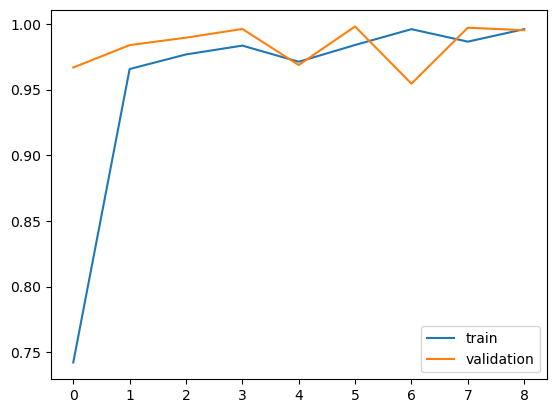

In [271]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(pre_history1)

# Pre Cycle - 1 : Augmentation
- batch size = 8
- Layer 1개
- Filter 64
- 퍼포먼스 미적용
- Flatten

In [85]:
import albumentations as A

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(p=1,brightness_limit=0.2, contrast_limit=0.2)],p=0.5)
    ],p=0.5)
    return aug(image=image)['image']

In [249]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/fruits/train'
validation_dir = './datasets/fruits/validation'
test_dir = './datasets/fruits/test'


train_data_generator =  ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 4313 images belonging to 33 classes.
Found 1056 images belonging to 33 classes.
Found 1349 images belonging to 33 classes.
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper_Green': 23, 'Pepper_Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato_Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit':

In [88]:
model = create_base_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 122, 122, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 300)                 │      17,280,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 33)                  │           9,933 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,328,953 (66.10 MB)

 Trainable params: 17,328,953 (66.10 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

In [90]:
pre_history = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb],
    shuffle=True
)

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 31s 218ms/step - acc: 0.2604 - loss: 2.8596 - val_acc: 0.9648 - val_loss: 0.1757 - learning_rate: 0.0010
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 29s 216ms/step - acc: 0.6737 - loss: 1.1343 - val_acc: 0.9898 - val_loss: 0.0864 - learning_rate: 0.0010
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 30s 218ms/step - acc: 0.7242 - loss: 0.9756 - val_acc: 0.9972 - val_loss: 0.0248 - learning_rate: 0.0010
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 29s 215ms/step - acc: 0.7349 - loss: 0.9656 - val_acc: 0.9805 - val_loss: 0.0588 - learning_rate: 0.0010
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 29s 216ms/step - acc: 0.7468 - loss: 0.9132 - val_acc: 0.9991 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 30s 216ms/step - acc: 0.7175 - loss: 1.0317 - val_acc: 1.0000 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 30s 216ms/step - acc: 0.7513 - loss: 0.9119 - val_acc: 0.9981 - val_loss: 0.0129 - learnin

In [91]:
model.evaluate(test_generator, batch_size=8)

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.9955 - loss: 0.0112


[0.010284556075930595, 0.9962935447692871]

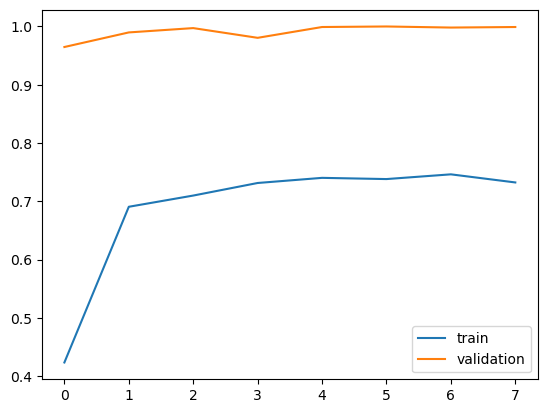

In [92]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(pre_history)

# Cycle 1 - Augmentation
- batch_size = 32
- Layer : 2
- Filter : 32, 64
- kernel_initializer, BN, Flatten 

In [190]:
import albumentations as A

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(p=1,brightness_limit=0.2, contrast_limit=0.2)],p=0.5)
    ],p=0.5)
    return aug(image=image)['image']

In [191]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/fruits/train'
validation_dir = './datasets/fruits/validation/'
test_dir = './datasets/fruits/test'


train_data_generator =  ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 4313 images belonging to 33 classes.
Found 1079 images belonging to 33 classes.
Found 1349 images belonging to 33 classes.
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper_Green': 23, 'Pepper_Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato_Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit':

In [192]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

    x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

    # x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    
    # x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [193]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_71 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_72 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 33)                  │           6,633 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,433,713 (28.36 MB)

 Trainable params: 7,433,521 (28.36 MB)

 Non-trainable params: 192 (768.00 B)

In [194]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [195]:
history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb],
    shuffle=True
)

# 변화가 없을 경우 32층의 maxpooling 없애고
# 64필터의 maxpooling 살리기

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 74s 535ms/step - acc: 0.1293 - loss: 4.8542 - val_acc: 0.3735 - val_loss: 2.4935 - learning_rate: 0.0010
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 72s 532ms/step - acc: 0.2593 - loss: 2.6493 - val_acc: 0.5292 - val_loss: 1.7777 - learning_rate: 0.0010
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 70s 516ms/step - acc: 0.3400 - loss: 2.3072 - val_acc: 0.5931 - val_loss: 1.3633 - learning_rate: 0.0010
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 70s 515ms/step - acc: 0.4091 - loss: 1.9917 - val_acc: 0.7006 - val_loss: 0.9514 - learning_rate: 0.0010
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 70s 519ms/step - acc: 0.4643 - loss: 1.7258 - val_acc: 0.8897 - val_loss: 0.4763 - learning_rate: 0.0010
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 71s 522ms/step - acc: 0.4781 - loss: 1.6873 - val_acc: 0.9184 - val_loss: 0.2989 - learning_rate: 0.0010
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 508ms/step - acc: 0.5078 - loss: 1.6222 - val_acc: 0.9435 - val_loss: 0.3127 - learnin

In [197]:
model.evaluate(test_generator, batch_size=32)

 2/43 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - acc: 0.9688 - loss: 0.1910 

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - acc: 0.9586 - loss: 0.1646


[0.16322554647922516, 0.9584877490997314]

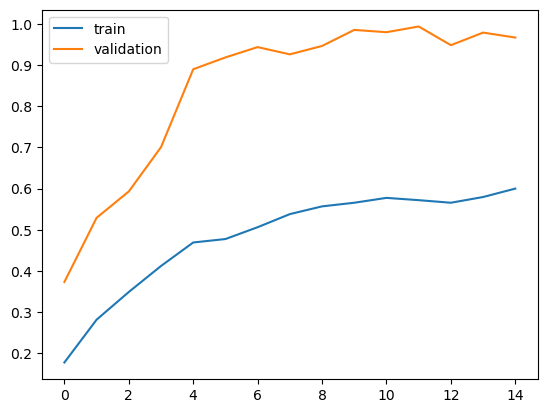

In [198]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

# Cycle 1-1 
- filter 64에 MaxPooling(2) 적용

In [199]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

    x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    # x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    
    # x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [200]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [201]:
history2 = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb],
    shuffle=True
)

# 변화가 없을 경우 32층의 maxpooling 없애고
# 64필터의 maxpooling 살리기

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 509ms/step - acc: 0.6059 - loss: 1.3074 - val_acc: 0.9917 - val_loss: 0.0515 - learning_rate: 1.0000e-04
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 506ms/step - acc: 0.6052 - loss: 1.3288 - val_acc: 0.9935 - val_loss: 0.0384 - learning_rate: 1.0000e-04
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 509ms/step - acc: 0.6283 - loss: 1.2567 - val_acc: 0.9954 - val_loss: 0.0321 - learning_rate: 1.0000e-04
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 509ms/step - acc: 0.6325 - loss: 1.2447 - val_acc: 0.9954 - val_loss: 0.0278 - learning_rate: 1.0000e-04
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 509ms/step - acc: 0.6299 - loss: 1.2465 - val_acc: 0.9972 - val_loss: 0.0273 - learning_rate: 1.0000e-04
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 509ms/step - acc: 0.6258 - loss: 1.2318 - val_acc: 0.9972 - val_loss: 0.0270 - learning_rate: 1.0000e-04
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 508ms/step - acc: 0.6501 - loss: 1.1966 - val_acc: 0.9981 - va

In [203]:
model.evaluate(test_generator, batch_size=32)

43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - acc: 0.9960 - loss: 0.0207


[0.02375812456011772, 0.9962935447692871]

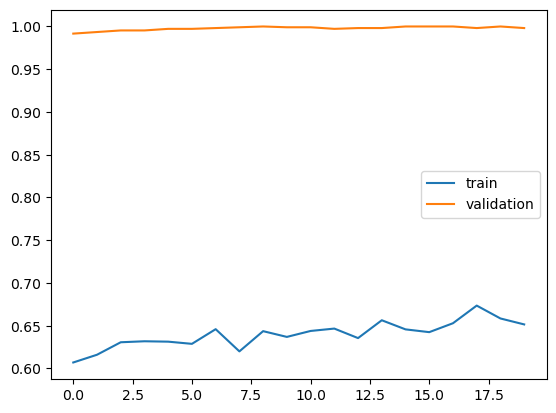

In [250]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history2)

# Cycle 2
- Augmentation (p=0.3)
- batch_size = 32
- filter 32, 64
- filter 32에 MaxPooling 적용
- kernel_initializer, batch normalization, flatten

In [205]:
import albumentations as A

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        
        A.OneOf([
            A.ColorJitter(p=0.3),
            A.RandomBrightnessContrast(p=1,brightness_limit=0.2, contrast_limit=0.2)],p=0.3)
    ],p=0.3)
    return aug(image=image)['image']

In [206]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/fruits/train'
validation_dir = './datasets/fruits/validation/'
test_dir = './datasets/fruits/test'


train_data_generator =  ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 4313 images belonging to 33 classes.
Found 1079 images belonging to 33 classes.
Found 1349 images belonging to 33 classes.
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper_Green': 23, 'Pepper_Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato_Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit':

In [207]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

    x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

    # x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    
    # x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [208]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_73 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_74 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_28 (Flatten)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 33)                  │           6,633 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,433,713 (28.36 MB)

 Trainable params: 7,433,521 (28.36 MB)

 Non-trainable params: 192 (768.00 B)

In [209]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle2/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [211]:
history3 = model.fit(
    train_generator,
    batch_size=32,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 506ms/step - acc: 0.8449 - loss: 0.4847 - val_acc: 0.9991 - val_loss: 0.0091 - learning_rate: 1.0000e-05
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 507ms/step - acc: 0.8340 - loss: 0.5237 - val_acc: 1.0000 - val_loss: 0.0088 - learning_rate: 1.0000e-05
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 506ms/step - acc: 0.8321 - loss: 0.5369 - val_acc: 1.0000 - val_loss: 0.0086 - learning_rate: 1.0000e-05
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 506ms/step - acc: 0.8478 - loss: 0.5142 - val_acc: 0.9991 - val_loss: 0.0085 - learning_rate: 1.0000e-05
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 507ms/step - acc: 0.8512 - loss: 0.5030 - val_acc: 0.9991 - val_loss: 0.0088 - learning_rate: 1.0000e-05
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 69s 507ms/step - acc: 0.8324 - loss: 0.5513 - val_acc: 0.9991 - val_loss: 0.0087 - learning_rate: 1.0000e-05
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 68s 505ms/step - acc: 0.8389 - loss: 0.5227 - val_acc: 1.0000 - va

In [213]:
model.evaluate(test_generator, batch_size=32)

 2/43 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - acc: 1.0000 - loss: 0.0061 

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - acc: 0.9997 - loss: 0.0104


[0.017172174528241158, 0.9992586970329285]

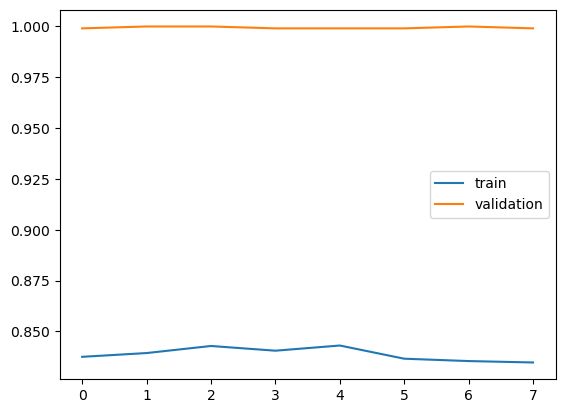

In [216]:
show_history(history3)

# Cycle 3 
- batch_size 16으로 변경

In [215]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/fruits/train'
validation_dir = './datasets/fruits/validation/'
test_dir = './datasets/fruits/test'


train_data_generator =  ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 4313 images belonging to 33 classes.
Found 1079 images belonging to 33 classes.
Found 1349 images belonging to 33 classes.
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper_Green': 23, 'Pepper_Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato_Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit':

In [217]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

    x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

    # x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    
    # x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [218]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_75 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_76               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_76 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_29 (Flatten)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 33)                  │           6,633 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,433,713 (28.36 MB)

 Trainable params: 7,433,521 (28.36 MB)

 Non-trainable params: 192 (768.00 B)

In [221]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle2/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [222]:
history4 = model.fit(
    train_generator,
    batch_size=16,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 74s 274ms/step - acc: 0.3831 - loss: 2.2519 - val_acc: 0.7266 - val_loss: 0.8811 - learning_rate: 0.0010
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 267ms/step - acc: 0.6689 - loss: 1.1315 - val_acc: 0.9073 - val_loss: 0.3013 - learning_rate: 0.0010
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 266ms/step - acc: 0.7713 - loss: 0.7696 - val_acc: 0.9583 - val_loss: 0.1264 - learning_rate: 0.0010
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 267ms/step - acc: 0.7658 - loss: 0.8147 - val_acc: 0.9926 - val_loss: 0.0465 - learning_rate: 0.0010
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 267ms/step - acc: 0.7914 - loss: 0.7013 - val_acc: 0.9425 - val_loss: 0.1533 - learning_rate: 0.0010
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 267ms/step - acc: 0.8017 - loss: 0.6770 - val_acc: 0.9870 - val_loss: 0.0492 - learning_rate: 0.0010
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 267ms/step - acc: 0.8156 - loss: 0.6080 - val_acc: 0.9963 - val_loss: 0.0180 - learnin

In [223]:
model.evaluate(test_generator, batch_size=16)

85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - acc: 1.0000 - loss: 4.3366e-04


[0.0004931023577228189, 1.0]

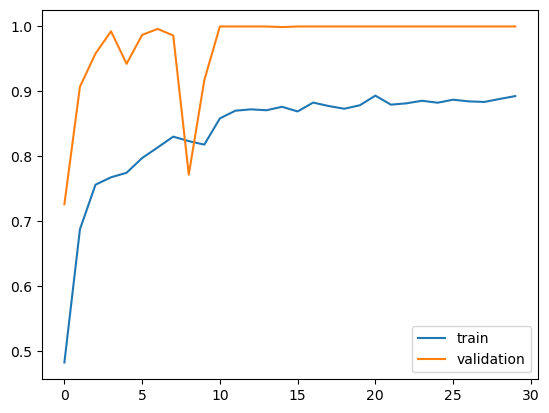

In [224]:
show_history(history4)

# Cycle 4 
- batch_size 16 변경

In [229]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/fruits/train'
validation_dir = './datasets/fruits/validation/'
test_dir = './datasets/fruits/test'


train_data_generator =  ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 4313 images belonging to 33 classes.
Found 1056 images belonging to 33 classes.
Found 1349 images belonging to 33 classes.
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper_Green': 23, 'Pepper_Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato_Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit':

In [248]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

    x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    # x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    
    # x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [231]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_79               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_79 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_80               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_80 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_31 (Flatten)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 33)                  │           6,633 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,433,713 (28.36 MB)

 Trainable params: 7,433,521 (28.36 MB)

 Non-trainable params: 192 (768.00 B)

In [232]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle2/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [233]:
history4 = model.fit(
    train_generator,
    batch_size=16,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 260ms/step - acc: 0.1442 - loss: 5.1280 - val_acc: 0.4309 - val_loss: 2.1245 - learning_rate: 0.0010
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 70s 260ms/step - acc: 0.3060 - loss: 2.3612 - val_acc: 0.5994 - val_loss: 1.4175 - learning_rate: 0.0010
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 262ms/step - acc: 0.3806 - loss: 2.0230 - val_acc: 0.6212 - val_loss: 1.3350 - learning_rate: 0.0010
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 261ms/step - acc: 0.4495 - loss: 1.7976 - val_acc: 0.8163 - val_loss: 0.7476 - learning_rate: 0.0010
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 261ms/step - acc: 0.5024 - loss: 1.5988 - val_acc: 0.8712 - val_loss: 0.5770 - learning_rate: 0.0010
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 261ms/step - acc: 0.5253 - loss: 1.4469 - val_acc: 0.9081 - val_loss: 0.4648 - learning_rate: 0.0010
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 261ms/step - acc: 0.5203 - loss: 1.4994 - val_acc: 0.8646 - val_loss: 0.4996 - learnin

In [234]:
model.evaluate(test_generator, batch_size=16)

85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - acc: 0.9999 - loss: 0.0317


[0.03409821540117264, 0.9992586970329285]

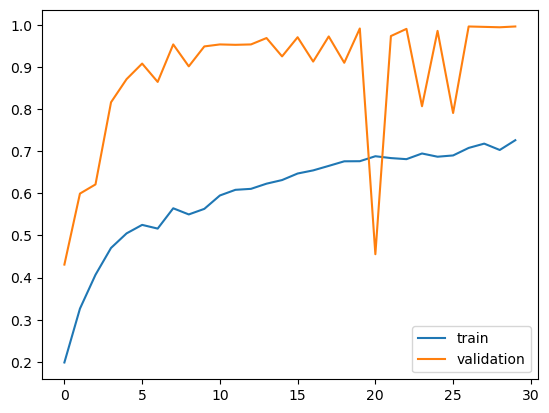

In [235]:
show_history(history4)

# Cycle 5
- Validation 분포 직접 조정

In [237]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

    x = Conv2D(filters=32, kernel_size=5, kernel_regularizer=l2(0.01), kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

    # x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    
    # x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=5, strides=5,kernel_regularizer=l2(0.01), kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [238]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_81               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_81 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_96 (Conv2D)                   │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_82               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_82 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 33)                  │           6,633 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,433,713 (28.36 MB)

 Trainable params: 7,433,521 (28.36 MB)

 Non-trainable params: 192 (768.00 B)

In [239]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle2/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [245]:
history5 = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 73s 271ms/step - acc: 0.7600 - loss: 0.9081 - val_acc: 0.9991 - val_loss: 0.2053 - learning_rate: 1.0000e-04
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 73s 268ms/step - acc: 0.7590 - loss: 0.8992 - val_acc: 0.9953 - val_loss: 0.2081 - learning_rate: 1.0000e-04
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 74s 272ms/step - acc: 0.7580 - loss: 0.8830 - val_acc: 0.9972 - val_loss: 0.2003 - learning_rate: 1.0000e-04
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 73s 269ms/step - acc: 0.7812 - loss: 0.8500 - val_acc: 0.9981 - val_loss: 0.1993 - learning_rate: 1.0000e-04
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 262ms/step - acc: 0.7628 - loss: 0.8907 - val_acc: 0.9991 - val_loss: 0.1947 - learning_rate: 1.0000e-04
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 75s 277ms/step - acc: 0.7675 - loss: 0.8733 - val_acc: 0.9934 - val_loss: 0.2045 - learning_rate: 1.0000e-04
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 261ms/step - acc: 0.7625 - loss: 0.8684 - val_acc: 0.9981 - va

In [246]:
model.evaluate(test_generator, batch_size=16)

85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - acc: 0.9954 - loss: 0.1630


[0.16083362698554993, 0.9977761507034302]

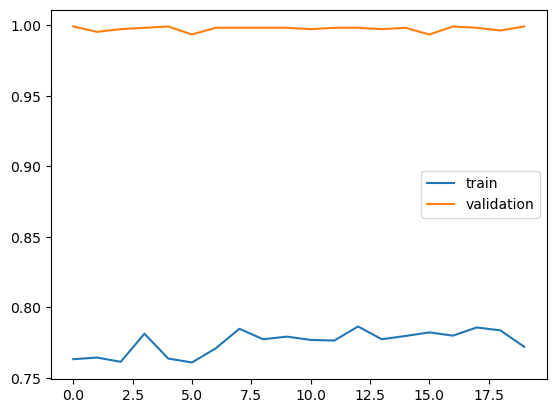

In [247]:
show_history(history5)

In [298]:
import albumentations as A

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        
        A.OneOf([
            A.ColorJitter(p=0.3),
            A.RandomBrightnessContrast(p=1,brightness_limit=0.2, contrast_limit=0.2)],p=0.3)
    ],p=0.3)
    return aug(image=image)['image']

In [299]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/fruits/train'
validation_dir = './datasets/fruits/validation/'
test_dir = './datasets/fruits/test'


train_data_generator =  ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 4313 images belonging to 33 classes.
Found 1056 images belonging to 33 classes.
Found 1349 images belonging to 33 classes.
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper_Green': 23, 'Pepper_Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato_Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
{'Apple_Braeburn': 0, 'Apple_Granny_Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus_fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber_Ripe': 11, 'Grape_Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion_White': 17, 'Orange': 18, 'Papaya': 19, 'Passion_Fruit':

In [311]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

    x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

    # x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    
    # x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [312]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_83               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_83 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_84 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_34 (Flatten)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 33)                  │           6,633 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,433,713 (28.36 MB)

 Trainable params: 7,433,521 (28.36 MB)

 Non-trainable params: 192 (768.00 B)

In [313]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [314]:
final_history = model.fit(
    train_generator,
    batch_size=16,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[mcp_cb,rlr_cb, ely_cb],
    shuffle=True
)

Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 77s 278ms/step - acc: 0.2050 - loss: 4.5072 - val_acc: 0.6136 - val_loss: 1.4491 - learning_rate: 0.0010
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 266ms/step - acc: 0.5077 - loss: 1.6568 - val_acc: 0.8362 - val_loss: 0.7408 - learning_rate: 0.0010
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 261ms/step - acc: 0.6145 - loss: 1.2810 - val_acc: 0.3513 - val_loss: 3.4259 - learning_rate: 0.0010
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 73s 269ms/step - acc: 0.6484 - loss: 1.1596 - val_acc: 0.6837 - val_loss: 1.1118 - learning_rate: 0.0010
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 262ms/step - acc: 0.7061 - loss: 1.0002 - val_acc: 0.9356 - val_loss: 0.1824 - learning_rate: 0.0010
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 70s 260ms/step - acc: 0.7094 - loss: 0.9258 - val_acc: 0.9593 - val_loss: 0.1636 - learning_rate: 0.0010
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 71s 261ms/step - acc: 0.7342 - loss: 0.8603 - val_acc: 0.9479 - val_loss: 0.1690 - 

In [315]:
model.evaluate(test_generator, batch_size=16)

85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.8696 - loss: 0.4573


[0.4492289423942566, 0.8702743053436279]

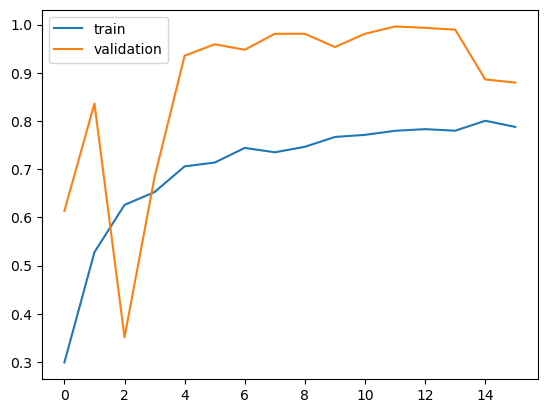

In [316]:
show_history(final_history)

In [317]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

    x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

    # x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    
    # x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(2)(x)

    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)
    x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)
    output = Dense(33, activation='softmax', kernel_initializer='glorot_normal')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [318]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_40 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_85 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_86 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_35 (Flatten)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 100)                 │       3,686,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 33)                  │           3,333 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,754,013 (14.32 MB)

 Trainable params: 3,753,821 (14.32 MB)

 Non-trainable params: 192 (768.00 B)

In [319]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [320]:
final_history_dnn = model.fit(
    train_generator,
    batch_size=16,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[mcp_cb,rlr_cb, ely_cb],
    shuffle=True
)

Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 72s 261ms/step - acc: 0.2947 - loss: 3.1425 - val_acc: 0.6695 - val_loss: 0.9595 - learning_rate: 0.0010
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 67s 249ms/step - acc: 0.7416 - loss: 0.8653 - val_acc: 0.9508 - val_loss: 0.1643 - learning_rate: 0.0010
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 66s 244ms/step - acc: 0.8244 - loss: 0.6019 - val_acc: 0.8428 - val_loss: 0.5389 - learning_rate: 0.0010
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 66s 244ms/step - acc: 0.8276 - loss: 0.6048 - val_acc: 0.5568 - val_loss: 6.0648 - learning_rate: 0.0010
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 65s 241ms/step - acc: 0.8612 - loss: 0.5023 - val_acc: 0.9943 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 65s 241ms/step - acc: 0.8732 - loss: 0.4739 - val_acc: 0.9773 - val_loss: 0.0689 - learning_rate: 0.0010
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 65s 241ms/step - acc: 0.8738 - loss: 0.4716 - val_acc: 0.9309 - val_loss: 0.3354 - 

In [321]:
model.evaluate(test_generator, batch_size=16)

85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.9583 - loss: 0.1021


[0.10653307288885117, 0.9614529013633728]

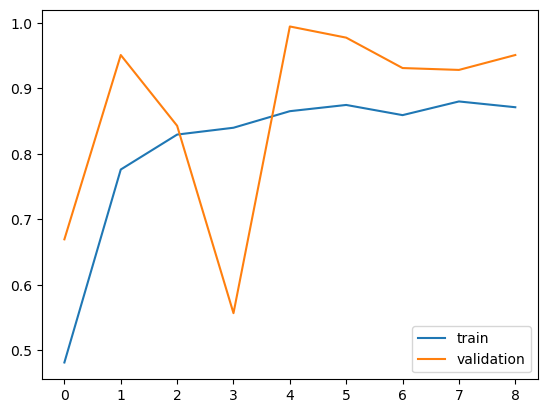

In [322]:
show_history(final_history_dnn)

### Total params: 17,328,953 (28.36 MB)

## 본격적인 학습 이전, 데이터의 정확도 파악을 위하여 층을 적게 쌓아 수치를 확인한다.

## Pre Cycle

- batch size = 8
- Filter = 64
- Augmentation 미적용
- 분류기 적용 이미지 크기 30, 30

- Epoch 9/20
- acc: 0.9924 - loss: 0.0268 - val_acc: 0.9953 - val_loss: 0.0106 - learning_rate: 0.0010


<img src='./images/pre1.png' width='500' style='margin-left:20px;'>

### test
- accuracy: 0.9993
- loss : 0.0075

---

## 과적합이므로 Augmentation으로 노이즈를 준다.

## Pre Cycle -1
- batch size = 8
- Filter = 64
- Augmentation(p=0.5) 적용
- 분류기 적용 이미지 크기 30, 30

- Epoch 8/20
- acc: 0.7322 - loss: 0.9783 - val_acc: 0.9991 - val_loss: 0.0040 - learning_rate: 0.0010


<img src='./images/pre2.png' width='500' style='margin-left:20px;'>


### test
- accuracy: 0.9955 
- loss: 0.0112

---

## 본격적인 학습을 진행한다.

### Total params: 7,433,713 (28.36 MB)


## Cycle 1
- batch size 32
- layer 2개
- Augmentation(p=0.5)적용
- Filter 32, 64
- Filter 32에 MaxPooling(2)적용
- 분류기 적용 이미지 크기 24, 24
- kernel_initializer, batch normalization, flatten

- Epoch 15/20
- acc: 0.6006 - loss: 1.3026 - val_acc: 0.9666 - val_loss: 0.1556 - learning_rate: 0.0010


<img src='./images/cycle1.png' width='500' style='margin-left:20px;'>


### test
- accuracy: 0.9586 
- loss: 0.1646

## 여러번의 학습결과 층과 데이터의 사이즈가 작을 수록 수치가 좋게 나오는 것을 확인

---

## accuracy가 낮게 나왔으므로 MaxPooling을 filter 64에 적용

## Cycle 1-1
- batch size 32
- layer 2개
- Augmentation(p=0.5)적용
- Filter 32, 64
- Filter 64에 MaxPooling(2)적용
- 분류기 적용 이미지 크기 24, 24
- kernel_initializer, batch normalization, flatten

- Epoch 18/20
- acc: 0.6817 - loss: 1.0877 - val_acc: 0.9981 - val_loss: 0.0160 - learning_rate: 1.0000e-04

<img src='./images/cycle1_1.png' width='500' style='margin-left:20px;'>

### test
- accuracy: 0.9960 
- loss: 0.1910

---

## accuracy가 낮게 나왔으므로 노이즈의 비율을 줄여본다.


## Cycle 2
- batch size 32
- layer 2개
- Augmentation **(p=0.3)** 적용
- Filter 32, 64
- Filter 32에 MaxPooling(2)적용
- 분류기 적용 이미지 크기 24, 24
- kernel_initializer, batch normalization, flatten

- Epoch 5/30
- acc: 0.8512 - loss: 0.5030 - val_acc: 0.9991 - val_loss: 0.0088 - learning_rate: 1.0000e-05

<img src='./images/cycle2.png' width='500' style='margin-left:20px;'>

### test
- accuracy: 0.9997 
- loss: 0.0104

---

## 데이터의 양이 많지 않으므로 배치 사이즈를 조정하여 수치를 확인한다.

## Cycle 3
- **batch size 16**
- layer 2개
- Augmentation **(p=0.3)** 적용
- Filter 32, 64
- Filter 32에 MaxPooling(2)적용
- 분류기 적용 이미지 크기 24, 24
- kernel_initializer, batch normalization, flatten

- Epoch 27/30
- acc: 0.8898 - loss: 0.3957 - val_acc: 1.0000 - val_loss: 4.5006e-04 - learning_rate: 1.0000e-05

<img src='./images/cycle3.png' width='500' style='margin-left:20px;'>

### test
- accuracy: 1.0000 
- loss: 4.3366e-04

---

## filter 64에 MaxPooling 을 2로 주어서 수치 확인

## Cycle 4
- **batch size 16**
- layer 2개
- Augmentation **(p=0.3)** 적용
- Filter 32, 64
- Filter 64에 MaxPooling(2)적용
- 분류기 적용 이미지 크기 24, 24
- kernel_initializer, batch normalization, flatten

- Epoch 28/30
- acc: 0.7313 - loss: 0.8303 - val_acc: 0.9953 - val_loss: 0.0424 - learning_rate: 1.0000e-04

<img src='./images/cycle4.png' width='500' style='margin-left:20px;'>

### test
- accuracy: 0.9999 
- loss: 0.0317

---

## test의 정확도가 0.99, validation도 0.99가 나왔으므로 규제를 걸어서 확인해본다. 

## Cycle 5 - 규제
- validation data 분포조정 (Grape_blue 69 -> 40)
- **batch size 16**
- layer 2개
- Augmentation **(p=0.3)** 적용
- Filter 32, 64
- Filter 64에 MaxPooling(2)적용
- 분류기 적용 이미지 크기 24, 24
- kernel_initializer, **kernel_regulation(0.01)**, batch normalization, flatten

- Epoch 17/20
- acc: 0.7733 - loss: 0.8595 - val_acc: 0.9991 - val_loss: 0.1700 - learning_rate: 1.0000e-04

<img src='./images/cycle5.png' width='500' style='margin-left:20px;'>

### test
- accuracy: 0.9954 
- loss: 0.1630

---

### Cycle 3 의 결과가 가장 좋으므로, 에포크를 늘려서 변화를 관찰 후 과적합의 경우 규제등의 조치를 취한다.

---

## Cycle 6 - epoch 100
- **batch size 16**
- layer 2개
- Augmentation **(p=0.3)** 적용
- Filter 32, 64
- Filter 32에 MaxPooling(2)적용
- 분류기 적용 이미지 크기 24, 24
- kernel_initializer, batch normalization, flatten

- Epoch 16/100
- acc: 0.7973 - loss: 0.6632 - val_acc: 0.8797 - val_loss: 0.4155 - learning_rate: 0.0010

<img src='./images/cycle6.png' width='500' style='margin-left:20px;'>

### test
- accuracy: 0.8696 
- loss: 0.4573

---

## Cycle 7 - epoch 100
- **batch size 16**
- layer 2개
- Augmentation **(p=0.3)** 적용
- Filter 32, 64
- Filter 32에 MaxPooling(2)적용
- 분류기의 Dropout 0.3 대신 Dense를 100씩 2개 DNN으로 변경
- 분류기 적용 이미지 크기 24, 24
- kernel_initializer, batch normalization, flatten

- Epoch 9/100
- acc: 0.8602 - loss: 0.5286 - val_acc: 0.9508 - val_loss: 0.1131 - learning_rate: 0.0010

<img src='./images/cycle7.png' width='500' style='margin-left:20px;'>

### test
- accuracy: 0.9583 
- loss: 0.1021

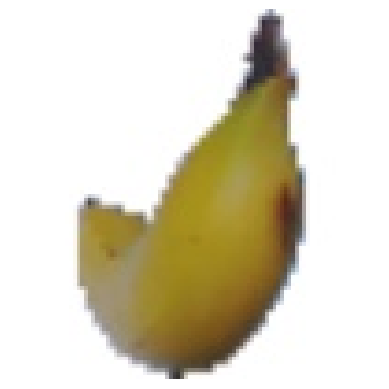

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Class Index: 4
Predicted Class Name: Banana


In [350]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


IMAGE_SIZE = 240

# 클래스 이름 정의
class_names = ['Apple_Braeburn', 'Apple_Granny_Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry',
               'Cactus_fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber_Ripe', 'Grape_Blue', 
               'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion_White', 'Orange', 'Papaya', 'Passion_Fruit', 'Peach', 
               'Pear', 'Pepper_Green', 'Pepper_Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato_Red', 'Raspberry', 
               'Strawberry', 'Tomato', 'Watermelon']

# 이미지 가져오기
image_path = './datasets/fruits/original_test/0495.jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# 이미지 보기 함수 (추가 기능으로 제공됨)
def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(image)

# 이미지 크기 변경
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 모델 예측
predicted = model.predict(resized_image, batch_size=16)[0]
print("Predicted:", predicted)

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)


## 8개 결과 확인 추가.